# Reinforcement Learning

# Online estimation

This notebook presents Monte-Carlo and TD learning for the maze.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from model import Maze
from agent import Agent, OnlinePolicyEvaluation

In [3]:
maze = Maze()
# set parameters
maze_map = np.load('maze_small.npy')
maze.set_parameters(maze_map, (1, 0), [(3, 8)])
# init
maze = Maze()

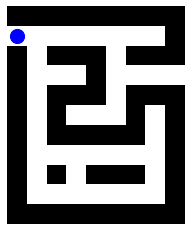

In [4]:
maze.display()

## Monte-Carlo estimation

In [5]:
class MonteCarlo(OnlinePolicyEvaluation):
    """Monte-Carlo evaluation of a policy."""
        
    def update_values(self):
        """Update the values from an episode."""
        stop, states, rewards = self.get_episode()
        gain = 0
        if stop:
            # penalization for incomplete episode
            gain = -100
        for state, reward in zip(reversed(states), reversed(rewards)):
            state_id = self.state_id[self.environment.encode(state)]
            gain = reward + self.gamma * gain
            self.values[state_id] += self.alpha * (gain - self.values[state_id])

In [6]:
agent = Agent(maze)
policy = agent.policy

In [7]:
algo = MonteCarlo(maze, policy)

In [8]:
n_episodes = 50
for t in range(n_episodes):
    algo.update_values()

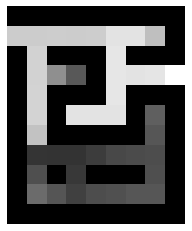

In [9]:
values = algo.values
maze.display_values(values)

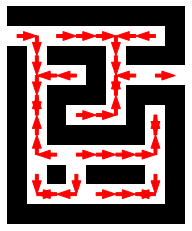

In [10]:
policy = algo.improve_policy()
maze.display_policy(policy)

## To do

* Test the convergence of Monte-Carlo.
* Test the impact of the exploration parameter $\varepsilon$.

## TD learning

## To do

* Implement and test TD learning.

In [11]:
class TDLearning(OnlinePolicyEvaluation):
    """TD learning."""
        
    def update_values(self):
        """Update values online."""
        self.environment.init_state()
        for t in range(self.n_steps):
            state = self.environment.state
            action = self.agent.get_action(state)
            reward, stop = self.environment.step(action)
            state_id = self.state_id[self.environment.encode(state)]
            state_id_target = self.state_id[self.environment.encode(self.environment.state)]
            # update self.values = ...
            if stop:
                break

In [12]:
agent = Agent(maze)
policy = agent.policy

In [13]:
algo = TDLearning(maze, policy)

In [14]:
n_episodes = 50
for t in range(n_episodes):
    algo.update_values()

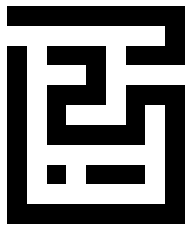

In [15]:
values = algo.values
maze.display_values(values)

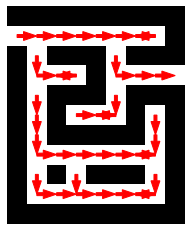

In [16]:
policy = algo.improve_policy()
maze.display_policy(policy)

## To do

* Compare Monte-Carlo and TD learning.
* Test on the larger maze below.

In [17]:
maze = Maze()
maze_map = np.load('maze.npy')
maze.set_parameters(maze_map, (1, 0), [(1, 20)])
maze = Maze()

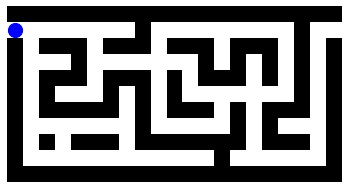

In [18]:
maze.display()